In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
#Class Distribution
df['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [5]:
#Functions for Preprocessing the Dataset
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
stop_words = set(stopwords.words('english'))


def mystopwords(text):
    return ' '.join([w for w in word_tokenize(text) if not w in stop_words])

import re
def clean_text(string):
  clean=re.sub('[\n]',' ',string) #remove newline character
  clean=re.sub('[^a-zA-Z]',' ',clean) #remove non alphabetic characters
  clean=mystopwords(clean) #remove stopwords
  return clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
#Cleaning the data and separating the texts and labels
sentences=[]
labels=[]
for i in range(len(df)):
  labels.append(df['target'][i])
  sentences.append(clean_text(df['question_text'][i]))

In [8]:
#Suffling the data and splitting the data into train and test sets (90:10)
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels= train_test_split(sentences, labels, test_size=0.1, shuffle= True)

In [9]:
#Data Summary
print('Length of the Data: ',len(df))
print('No. of Training Examples: ',len(train_sentences))
print('No. of Validation Examples: ',len(val_sentences))
print('No. of Classes: ',df['target'].nunique())

Length of the Data:  1306122
No. of Training Examples:  1175509
No. of Validation Examples:  130613
No. of Classes:  2


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',MultinomialNB())
                   ])

Test Accuracy using MultiNomial Naive Bayes Classifier:  0.9383369189896871


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97    122559
           1       0.00      0.00      0.00      8054

    accuracy                           0.94    130613
   macro avg       0.47      0.50      0.48    130613
weighted avg       0.88      0.94      0.91    130613

[[122559      0]
 [  8054      0]]


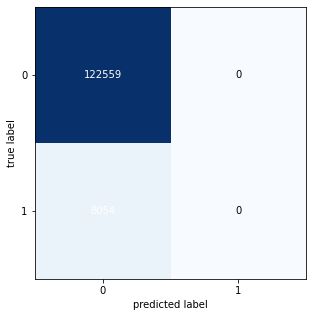

In [11]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(val_sentences)

from sklearn.metrics import accuracy_score
print('Test Accuracy using MultiNomial Naive Bayes Classifier: ',accuracy_score(val_labels,pred))

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred))
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred))
CM = confusion_matrix(val_labels, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',LogisticRegression())
                   ])

Test Accuracy using Logistic Regression Classifier:  0.9383752000183749
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    122559
           1       0.55      0.00      0.01      8054

    accuracy                           0.94    130613
   macro avg       0.74      0.50      0.49    130613
weighted avg       0.91      0.94      0.91    130613

[[122537     22]
 [  8027     27]]


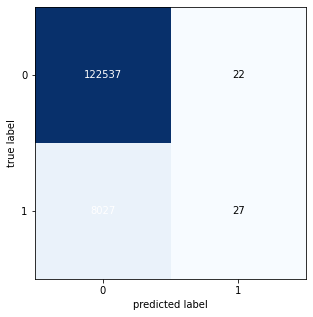

In [13]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(val_sentences)

from sklearn.metrics import accuracy_score
print('Test Accuracy using Logistic Regression Classifier: ',accuracy_score(val_labels,pred))

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
print(classification_report(val_labels,pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred))
CM = confusion_matrix(val_labels, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()